In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM, z_at_value

file = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(file) # 30,911 galaxies
df = df[df['Use'] == 1] # 13,299 galaxies
df = df[df['LIR'] > 0] # 8,486 galaxies

z_bins = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]
mag_lim = 25.9

### Bolometric Luminosity vs Redshift

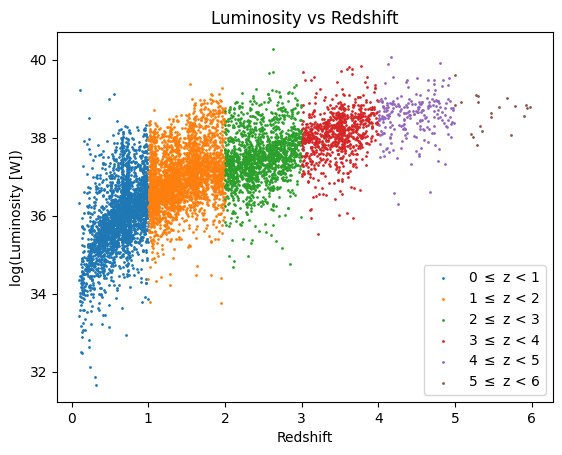

In [4]:
z = df['zpk'].values # redshift

lum = df['LIR'].copy().values # solar luminosity
lum *= 3.828 * 10 ** 26 # solar luminosity -> Watts

for z_start, z_end in z_bins:
    mask_z = (z >= z_start) & (z < z_end)
    plt.scatter(z[mask_z], np.log10(lum[mask_z]), s=1, label=f'{z_start} $\leq$ z < {z_end}')
plt.title('Luminosity vs Redshift')
plt.xlabel('Redshift')
plt.ylabel('log(Luminosity [W])')
plt.legend()
plt.show()

### Bolometric Flux

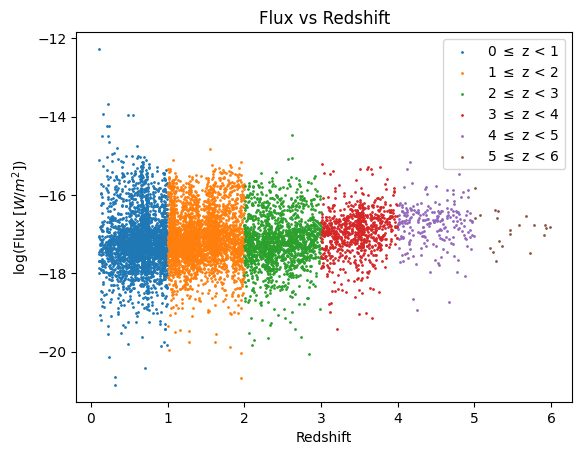

In [5]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
d_L = cosmo.luminosity_distance(z).to('m').value # m
F = lum / (4 * np.pi * (d_L)**2) # W / m^2 = W/m^2

for z_start, z_end in z_bins:
    mask_z = (z >= z_start) & (z < z_end)
    plt.scatter(z[mask_z], np.log10(F[mask_z]), s=1, label=f'{z_start} $\leq$ z < {z_end}')
plt.title('Flux vs Redshift')
plt.xlabel('Redshift')
plt.ylabel('log(Flux [$W/m^2$])')
plt.legend()
plt.show()

### Maximum Distance

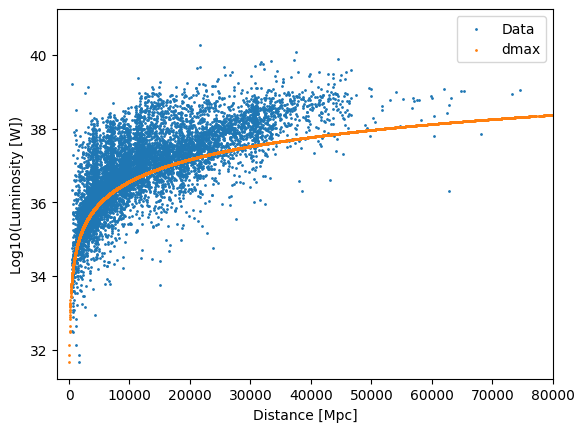

In [6]:
F_lim = 3.1 * 10 ** -18 # W/m^2 - https://www.researchgate.net/figure/Flux-limit-and-Completeness_tbl2_45878262

dmaxs = np.sqrt(lum / (4 * np.pi * F_lim)) # sqrt(W / W/m^2) = m

plt.scatter(d_L*3.241*10**-23, np.log10(lum), s=1, label='Data')
plt.scatter(dmaxs*3.241*10**-23, np.log10(lum), s=1, label='dmax')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Log10(Luminosity [W])')
plt.xlim(-2000, 80000)
plt.legend()
plt.show()

### Limit

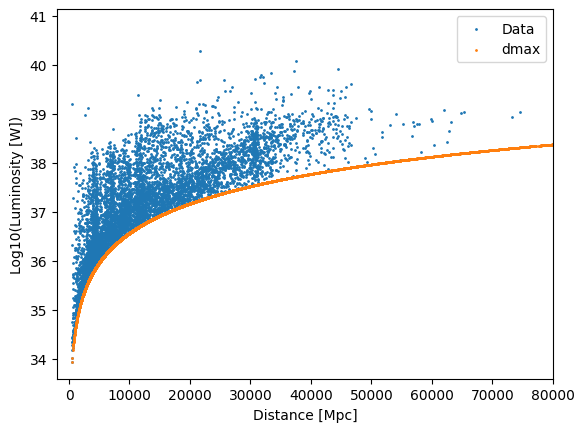

In [14]:
mask_d = d_L <= dmaxs

# d_cm = d_L / (1 + z) # Mpc

plt.scatter(d_L[mask_d]*3.241*10**-23, np.log10(lum[mask_d]), s=1, label='Data')
# plt.scatter(d_cm[mask_d]*3.241*10**-23, np.log10(lum[mask_d]), s=1, label='cm')
plt.scatter(dmaxs[mask_d]*3.241*10**-23, np.log10(lum[mask_d]), s=1, label='dmax')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Log10(Luminosity [W])')
plt.xlim(-2000, 80000)
plt.legend()
plt.show()